In [1]:
#importing required libraries for data analysis
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#open csv file
df=pd.read_csv("C:\\Users\\Ajay\\Downloads\\kaggle drug dataset\\DRUG.csv")

In [4]:
df
df.columns=df.columns.map(str.lower)
df.head(5)

,age,sex,bp,cholesterol,na_to_k,drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
# check data types, it provides also details on null values, so next checking of null values may not be required
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          200 non-null    int64  
 1   sex          200 non-null    object 
 2   bp           200 non-null    object 
 3   cholesterol  200 non-null    object 
 4   na_to_k      200 non-null    float64
 5   drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.isna().sum()

age            0
sex            0
bp             0
cholesterol    0
na_to_k        0
drug           0
dtype: int64

In [6]:
df.dtypes

age              int64
sex             object
bp              object
cholesterol     object
na_to_k        float64
drug            object
dtype: object

In [7]:
df.info

<bound method DataFrame.info of      age sex      bp cholesterol  na_to_k   drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

#now we have to check no of types present in each columns

In [8]:
df["sex"].value_counts()

sex
M    104
F     96
Name: count, dtype: int64

In [9]:
df["bp"].value_counts()

bp
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [10]:
df["cholesterol"].value_counts()

cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [11]:
df["drug"].value_counts()

drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

# Encoding and scaling
i will use sklearn library to encode sex,bp and cholesterol and scale numerical values

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])
df["bp"]=le.fit_transform(df["bp"])
df["cholesterol"]=le.fit_transform(df["cholesterol"])

In [14]:
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


<Axes: xlabel='sex'>

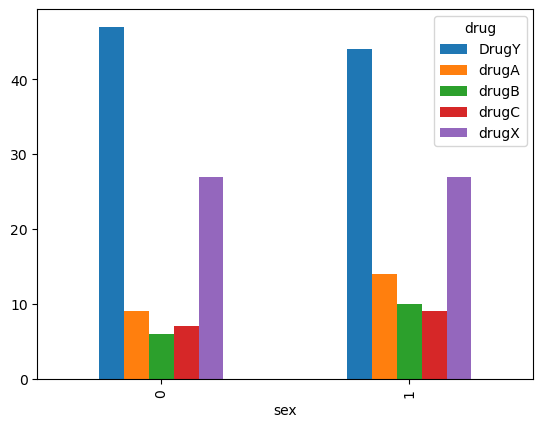

In [15]:
pd.crosstab(df.sex,df.drug).plot(kind="bar")

# sepatate the datset into x and y


In [16]:
x=df.iloc[:,:5]
print(x)

     age  sex  bp  cholesterol  na_to_k
0     23    0   0            0   25.355
1     47    1   1            0   13.093
2     47    1   1            0   10.114
3     28    0   2            0    7.798
4     61    0   1            0   18.043
..   ...  ...  ..          ...      ...
195   56    0   1            0   11.567
196   16    1   1            0   12.006
197   52    1   2            0    9.894
198   23    1   2            1   14.020
199   40    0   1            1   11.349

[200 rows x 5 columns]


In [17]:
y=df["drug"]
print(y)

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: drug, Length: 200, dtype: object


# Split data for modeling
This is very needed in order to be able to compare performance of model on unseen data. I will choose test size to be 0.20 Dataset is also split to X (features) and y (target) variables.

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (160, 5) (160,)
Test set: (40, 5) (40,)


# feature scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [20]:
print(x_train)

[[-1.82964966e-01 -1.06458129e+00 -1.05481901e+00 -9.27612590e-01
   6.89673485e-01]
 [-9.66024903e-01  9.39336437e-01 -1.05481901e+00 -9.27612590e-01
  -4.49466986e-01]
 [-8.45554143e-01  9.39336437e-01 -1.05481901e+00 -9.27612590e-01
   1.98896207e+00]
 [ 1.20244877e+00 -1.06458129e+00  1.68159552e-01  1.07803625e+00
  -3.22323313e-01]
 [ 3.59153452e-01 -1.06458129e+00  1.68159552e-01  1.07803625e+00
   9.63596384e-01]
 [-2.25882674e-03  9.39336437e-01  1.68159552e-01  1.07803625e+00
  -1.07418388e+00]
 [ 9.01271870e-01  9.39336437e-01  1.39113811e+00 -9.27612590e-01
  -1.27081877e-01]
 [-1.14673104e+00  9.39336437e-01  1.68159552e-01  1.07803625e+00
   6.71987564e-01]
 [-7.85318764e-01 -1.06458129e+00 -1.05481901e+00  1.07803625e+00
  -8.06527643e-01]
 [ 1.74456719e+00  9.39336437e-01 -1.05481901e+00  1.07803625e+00
  -9.01781824e-02]
 [-1.02626028e+00 -1.06458129e+00  1.39113811e+00 -9.27612590e-01
   5.00141678e-01]
 [ 4.79624211e-01 -1.06458129e+00 -1.05481901e+00  1.07803625e+00

In [21]:
print(x_test)

[[-1.32743718  0.93933644  0.16815955 -0.92761259 -1.22346977]
 [-1.02626028 -1.06458129  1.39113811 -0.92761259 -0.44626402]
 [-0.18296497  0.93933644  0.16815955 -0.92761259  0.5472113 ]
 [-1.50814332  0.93933644 -1.05481901  1.07803625  2.72327597]
 [-1.20696642  0.93933644  1.39113811 -0.92761259  0.40767355]
 [-1.50814332 -1.06458129  0.16815955  1.07803625 -0.61240028]
 [-1.38767256 -1.06458129  1.39113811 -0.92761259 -1.04117944]
 [-0.48414186 -1.06458129  0.16815955  1.07803625 -0.56783733]
 [-0.12272959  0.93933644  0.16815955 -0.92761259 -0.09853374]
 [ 0.60009497  0.93933644  1.39113811  1.07803625 -1.22862236]
 [-1.2672018   0.93933644 -1.05481901  1.07803625 -0.92030243]
 [-1.5683787  -1.06458129 -1.05481901  1.07803625  1.37663925]
 [-1.38767256 -1.06458129 -1.05481901  1.07803625  0.93783343]
 [-0.48414186  0.93933644  0.16815955  1.07803625  0.0891877 ]
 [ 0.90127187  0.93933644 -1.05481901 -0.92761259 -0.29934554]
 [-0.24320035  0.93933644  0.16815955 -0.92761259 -0.70

# MODEL SELECTION
We will use several popular models and see how they perform on our dataset. At the end we choose 3 best performing models and will merge them together.


In [32]:


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier

# LOGISTIC REGRESSION

In [33]:
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [34]:
y_pred=lr.predict(x_test)

In [35]:
print(y_pred)

['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'DrugY' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX']


In [36]:
print("Logistic regression")
print(classification_report(y_test, y_pred,digits=4))

Logistic regression
              precision    recall  f1-score   support

       DrugY     0.9048    1.0000    0.9500        19
       drugA     1.0000    1.0000    1.0000         3
       drugB     1.0000    1.0000    1.0000         1
       drugC     1.0000    0.6667    0.8000         3
       drugX     1.0000    0.9286    0.9630        14

    accuracy                         0.9500        40
   macro avg     0.9810    0.9190    0.9426        40
weighted avg     0.9548    0.9500    0.9483        40



In [37]:
ac=accuracy_score(y_test,y_pred)
print(ac)

0.95


In [38]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[19  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 1  0  0  2  0]
 [ 1  0  0  0 13]]


# k neighbour classifier

In [39]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
k =5
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
y_pred = neigh.predict(x_test)
y_pred[0:5]

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY'], dtype=object)

In [40]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.86875
Test set Accuracy:  0.825


In [41]:
print(" knn")
print(classification_report(y_test, y_pred,digits=4))

 knn
              precision    recall  f1-score   support

       DrugY     0.9333    0.7368    0.8235        19
       drugA     0.6000    1.0000    0.7500         3
       drugB     1.0000    1.0000    1.0000         1
       drugC     0.7500    1.0000    0.8571         3
       drugX     0.8000    0.8571    0.8276        14

    accuracy                         0.8250        40
   macro avg     0.8167    0.9188    0.8517        40
weighted avg     0.8496    0.8250    0.8264        40



In [42]:
ac=accuracy_score(y_test,y_pred)
print(ac)

0.825


In [43]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[14  1  0  1  3]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 1  1  0  0 12]]


# svm

In [44]:

svm=SVC()
svm.fit(x_train, y_train) 
y_pred = svm.predict(x_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, svm.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.95625
Test set Accuracy:  0.975


In [45]:
print("Support Vector Classifier ")
print(classification_report(y_test, y_pred,digits=4))

Support Vector Classifier 
              precision    recall  f1-score   support

       DrugY     1.0000    0.9474    0.9730        19
       drugA     1.0000    1.0000    1.0000         3
       drugB     1.0000    1.0000    1.0000         1
       drugC     1.0000    1.0000    1.0000         3
       drugX     0.9333    1.0000    0.9655        14

    accuracy                         0.9750        40
   macro avg     0.9867    0.9895    0.9877        40
weighted avg     0.9767    0.9750    0.9751        40



In [46]:
ac=accuracy_score(y_test,y_pred)
print(ac)

0.975


In [47]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[18  0  0  0  1]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]


# decision tree

In [48]:

tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, tree.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  1.0
Test set Accuracy:  1.0


In [49]:
print(tree)
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred,digits=4))

DecisionTreeClassifier(criterion='entropy', max_depth=5)
-------------------------------------------------------
              precision    recall  f1-score   support

       DrugY     1.0000    1.0000    1.0000        19
       drugA     1.0000    1.0000    1.0000         3
       drugB     1.0000    1.0000    1.0000         1
       drugC     1.0000    1.0000    1.0000         3
       drugX     1.0000    1.0000    1.0000        14

    accuracy                         1.0000        40
   macro avg     1.0000    1.0000    1.0000        40
weighted avg     1.0000    1.0000    1.0000        40



In [50]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[19  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]


# RANDOM FOREST

In [51]:

rfc = RandomForestClassifier(n_jobs=-1,random_state=123)
rfc.fit(x_train, y_train)

y_test = rfc.predict(x_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, tree.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  1.0
Test set Accuracy:  1.0


In [52]:
print("Random Forest Classifier")
print(classification_report(y_test, y_pred,digits=4))

Random Forest Classifier
              precision    recall  f1-score   support

       DrugY     1.0000    1.0000    1.0000        19
       drugA     1.0000    1.0000    1.0000         3
       drugB     1.0000    1.0000    1.0000         1
       drugC     1.0000    1.0000    1.0000         3
       drugX     1.0000    1.0000    1.0000        14

    accuracy                         1.0000        40
   macro avg     1.0000    1.0000    1.0000        40
weighted avg     1.0000    1.0000    1.0000        40



In [53]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[19  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]
